In [4]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)

In [5]:
dirt_percentage = ctrl.Antecedent(np.arange(0, 100, 1), 'dirt_percentage')
weight = ctrl.Antecedent(np.arange(1, 7.5, 0.5), 'weight')
water_hardness = ctrl.Antecedent(np.arange(0, 221, 1), 'water_hardness')

In [6]:
time = ctrl.Consequent(np.arange(0.5, 3.25, 0.25), 'time')

In [19]:
time['Quick'] = fuzz.trapmf(time.universe, [0.5, 0.5, 1, 1.5])
time['Regular'] = fuzz.trimf(time.universe, [1, 1.75, 2.5])
time['Long'] = fuzz.trapmf(time.universe, [2, 2.5, 3, 3])

dirt_percentage['Low'] = fuzz.trapmf(dirt_percentage.universe, [0, 0, 15, 30])
dirt_percentage['Medium'] = fuzz.trimf(dirt_percentage.universe, [20, 45, 70])
dirt_percentage['High'] = fuzz.trapmf(dirt_percentage.universe, [65, 80, 100, 100])

weight['Light'] = fuzz.trapmf(weight.universe, [1, 1, 2, 3])
weight['Medium'] = fuzz.trimf(weight.universe, [2.5, 4, 5.5])
weight['Heavy'] = fuzz.trapmf(weight.universe, [5, 6, 7, 7])

water_hardness['Soft'] = fuzz.trapmf(water_hardness.universe, [0, 0, 40, 75])
water_hardness['Medium'] = fuzz.trimf(water_hardness.universe, [60, 120, 180])
water_hardness['Hard'] = fuzz.trapmf(water_hardness.universe, [150, 180, 220, 220])

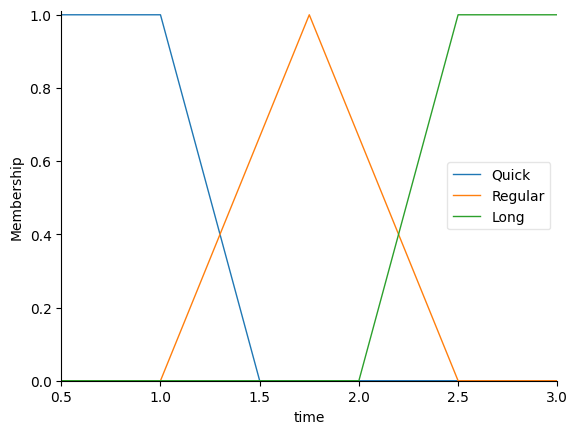

In [20]:
time.view()

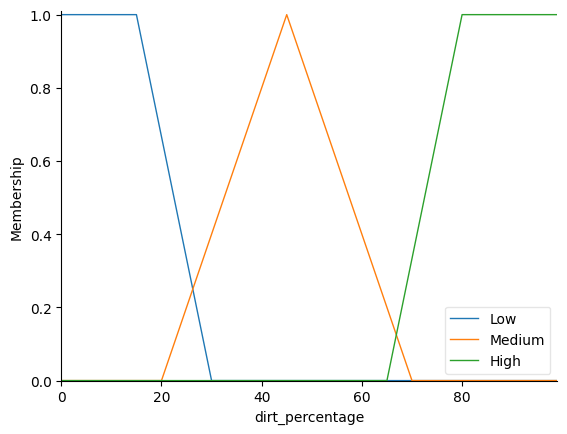

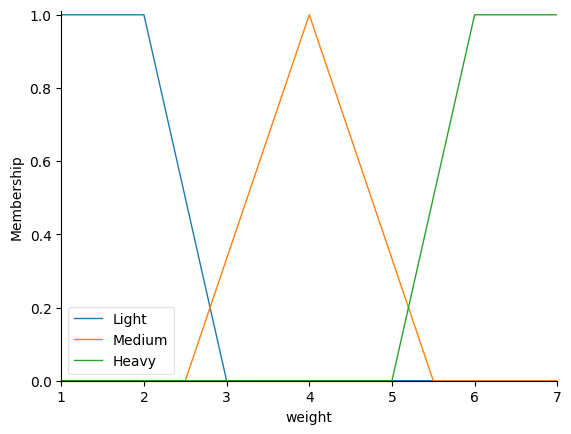

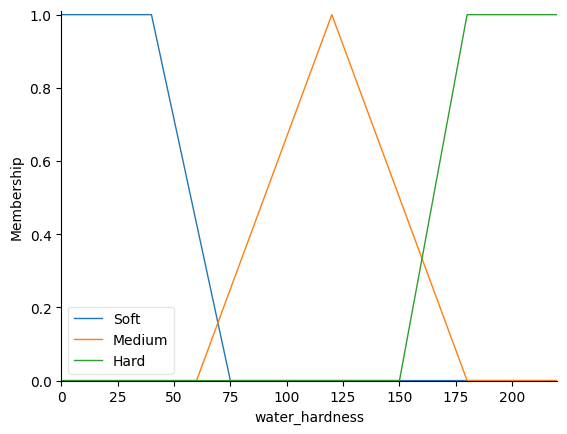

In [21]:
dirt_percentage.view()
weight.view()
water_hardness.view()

In [22]:
control_system = ctrl.ControlSystem([
    ctrl.Rule(dirt_percentage['Low'] & weight['Light'] & water_hardness['Soft'], time['Quick']),
    ctrl.Rule(dirt_percentage['Low'] & weight['Light'] & water_hardness['Medium'], time['Quick']),
    ctrl.Rule(dirt_percentage['Low'] & weight['Light'] & water_hardness['Hard'], time['Regular']),

    ctrl.Rule(dirt_percentage['Low'] & weight['Medium'] & water_hardness['Soft'], time['Quick']),
    ctrl.Rule(dirt_percentage['Low'] & weight['Medium'] & water_hardness['Medium'], time['Regular']),
    ctrl.Rule(dirt_percentage['Low'] & weight['Medium'] & water_hardness['Hard'], time['Regular']),

    ctrl.Rule(dirt_percentage['Low'] & weight['Heavy'] & water_hardness['Soft'], time['Regular']),
    ctrl.Rule(dirt_percentage['Low'] & weight['Heavy'] & water_hardness['Medium'], time['Long']),
    ctrl.Rule(dirt_percentage['Low'] & weight['Heavy'] & water_hardness['Hard'], time['Long']),

    ctrl.Rule(dirt_percentage['Medium'] & weight['Light'] & water_hardness['Soft'], time['Quick']),
    ctrl.Rule(dirt_percentage['Medium'] & weight['Light'] & water_hardness['Medium'], time['Regular']),
    ctrl.Rule(dirt_percentage['Medium'] & weight['Light'] & water_hardness['Hard'], time['Regular']),

    ctrl.Rule(dirt_percentage['Medium'] & weight['Medium'] & water_hardness['Soft'], time['Regular']),
    ctrl.Rule(dirt_percentage['Medium'] & weight['Medium'] & water_hardness['Medium'], time['Regular']),
    ctrl.Rule(dirt_percentage['Medium'] & weight['Medium'] & water_hardness['Hard'], time['Long']),

    ctrl.Rule(dirt_percentage['Medium'] & weight['Heavy'] & water_hardness['Soft'], time['Long']),
    ctrl.Rule(dirt_percentage['Medium'] & weight['Heavy'] & water_hardness['Medium'], time['Long']),
    ctrl.Rule(dirt_percentage['Medium'] & weight['Heavy'] & water_hardness['Hard'], time['Long']),

    ctrl.Rule(dirt_percentage['High'] & weight['Light'] & water_hardness['Soft'], time['Regular']),
    ctrl.Rule(dirt_percentage['High'] & weight['Light'] & water_hardness['Medium'], time['Long']),
    ctrl.Rule(dirt_percentage['High'] & weight['Light'] & water_hardness['Hard'], time['Long']),

    ctrl.Rule(dirt_percentage['High'] & weight['Medium'] & water_hardness['Soft'], time['Long']),
    ctrl.Rule(dirt_percentage['High'] & weight['Medium'] & water_hardness['Medium'], time['Long']),
    ctrl.Rule(dirt_percentage['High'] & weight['Medium'] & water_hardness['Hard'], time['Long']),

    ctrl.Rule(dirt_percentage['High'] & weight['Heavy'] & water_hardness['Soft'], time['Long']),
    ctrl.Rule(dirt_percentage['High'] & weight['Heavy'] & water_hardness['Medium'], time['Long']),
    ctrl.Rule(dirt_percentage['High'] & weight['Heavy'] & water_hardness['Hard'], time['Long']),
])

In [23]:
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

2.611111111111111 hours of washing


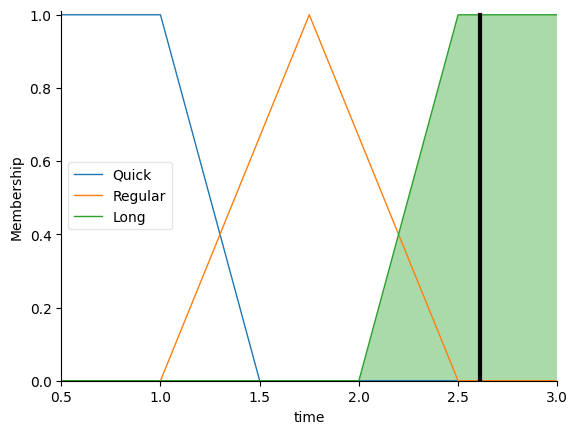

In [24]:
fuzzy_system.input['dirt_percentage'] = 85
fuzzy_system.input['weight'] = 6
fuzzy_system.input['water_hardness'] = 180
fuzzy_system.compute()
print(fuzzy_system.output['time'], 'hours of washing')
time.view(sim = fuzzy_system)

1.75 hours of washing


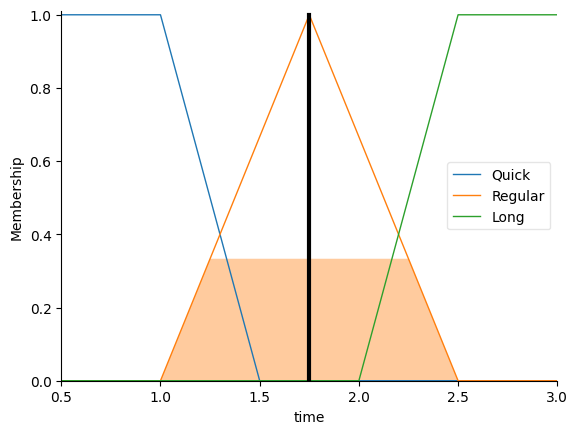

In [25]:
fuzzy_system.input['dirt_percentage'] = 40
fuzzy_system.input['weight'] = 3
fuzzy_system.input['water_hardness'] = 100
fuzzy_system.compute()
print(fuzzy_system.output['time'], 'hours of washing')
time.view(sim = fuzzy_system)

0.9485714285714287 hours of washing


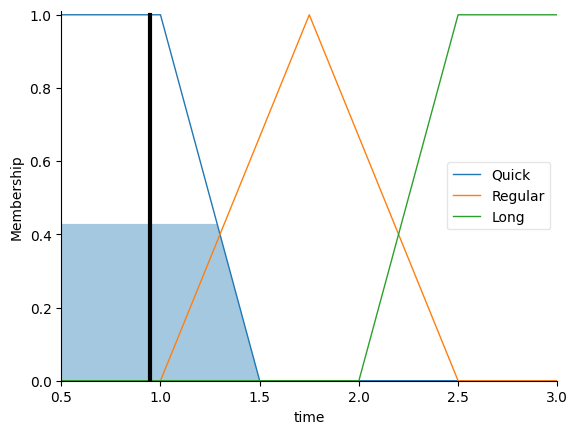

In [26]:
fuzzy_system.input['dirt_percentage'] = 40
fuzzy_system.input['weight'] = 2
fuzzy_system.input['water_hardness'] = 60
fuzzy_system.compute()
print(fuzzy_system.output['time'], 'hours of washing')
time.view(sim = fuzzy_system)

2.0480619157363344 hours of washing


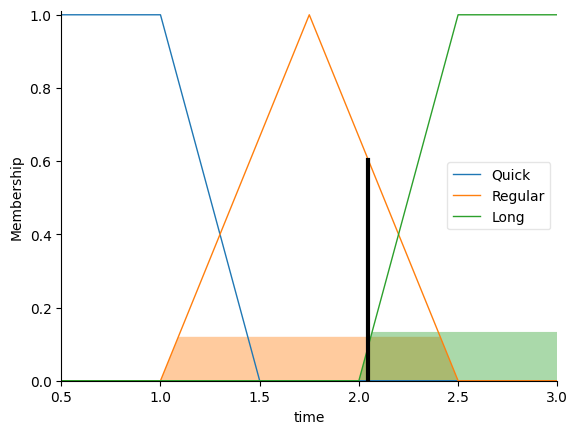

In [37]:
fuzzy_system.input['dirt_percentage'] = 67
fuzzy_system.input['weight'] = 5
fuzzy_system.input['water_hardness'] = 50
fuzzy_system.compute()
print(fuzzy_system.output['time'], 'hours of washing')
time.view(sim = fuzzy_system)